# Showcase of how to use the data loading class and plot some data



Start with importing necessary packages

In [1]:
import numpy as np
import uproot as ur
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from DataLoader import DataLoader as DL
import glob

## Method review

Load the data from a directory containing your root files


The data loading method has the following inputs parameters:

```python
def load_data(
    filename, 
    axis: str = 'x', 
    material=None, 
    interaction=None, 
    splitting_factor_brem=200, 
    splitting_factor_char=1
):
    """
    Parameters:
    - filename: str
        Path to the root file or files to be loaded.
    - axis: str, default 'x'
        Axis along which the data is analyzed.
    - material: optional (if one wants events only from 'w' or 'di')
        Specify the material for filtering data.
    - interaction: optional (events only from the 'brem' or 'char' interactions)
        Specify the interaction type for filtering data.
    - splitting_factor_brem: int, default 200
        Factor for splitting bremsstrahlung events.
    - splitting_factor_char: int, default 1
        Factor for splitting charged particle events.
    """

```

## Output
The output of the method is structured as:

```python
x, weights, sim_parameters = DL.load_data(filename, axis = 'x')

sim_parameters = pd.DataFrame({
                'acc_voltage': acc_voltage,
                'angle': angle,
                'diamond_thickness': diamond_thickness,
                'tungsten_thickness': film_thickness,
                'n_primaries': n_primaries,
                'simulation_time': time,
                'splitting_factor_brem': splitting_factor_brem,
                })

```

### Notes

If the run was made with particle splitting of the bremsstrahlung process, when plotting the spot one probably wants to use data from only the bremsstrahlung process, otherwise the spot will look blotched. 
//
Another solution is to just not use the weights when constructing the histogram, but it is better to just use the weights so that the physics is still contained.

Found 1 files in C:/Users/felnor/OneDrive - Excillum AB/Desktop/Analysis repo/data/HR_no_bias


C:\Users\felnor\AppData\Local\Temp\ipykernel_8068\3167991226.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()
C:\Users\felnor\AppData\Local\Temp\ipykernel_8068\3167991226.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend()


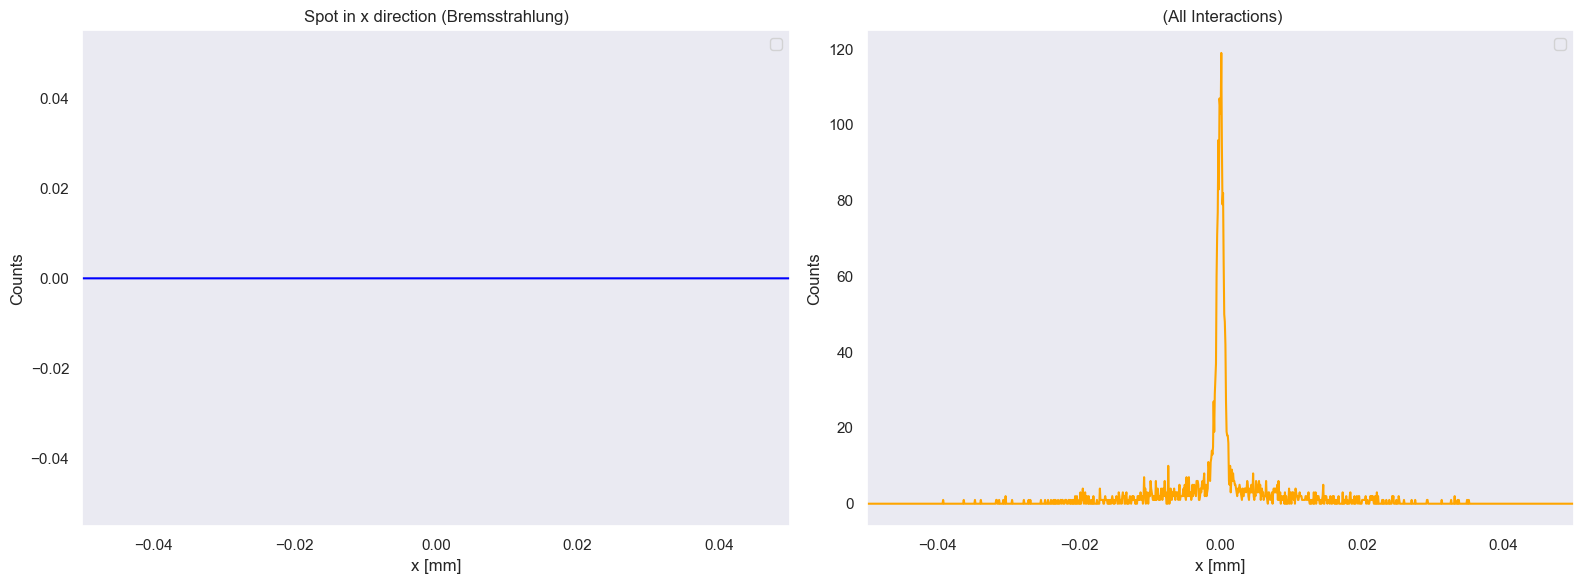

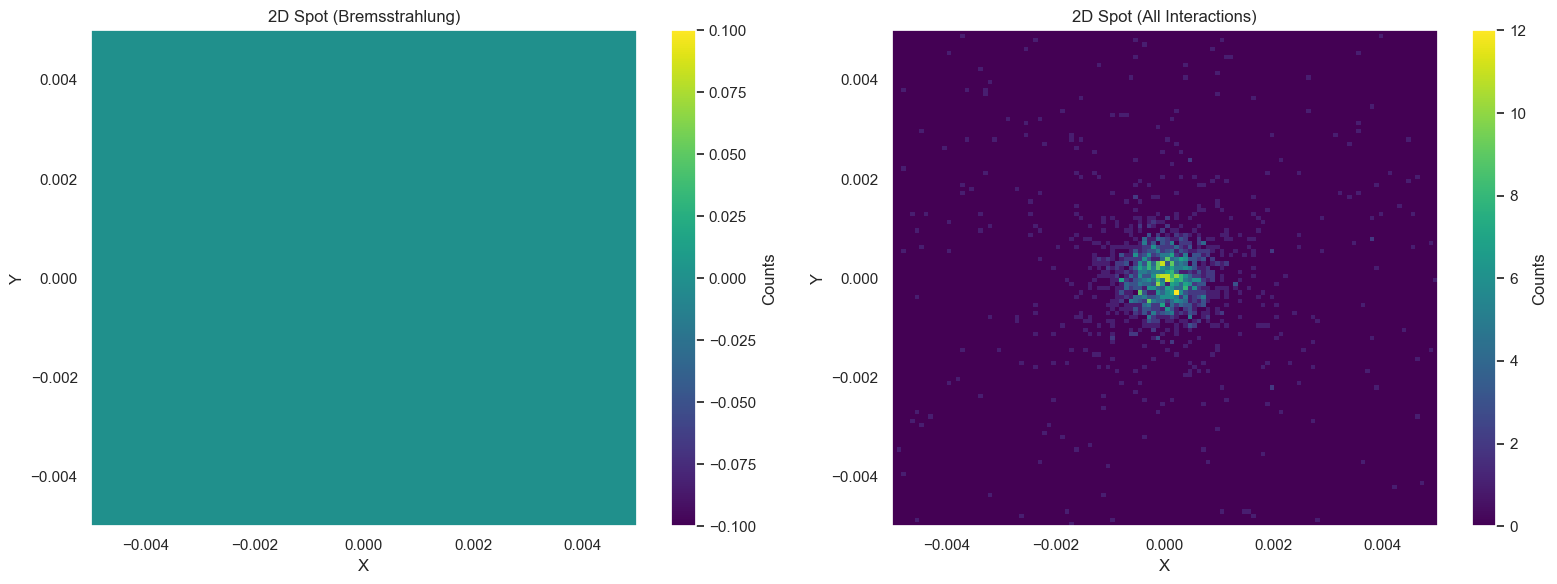

In [ ]:
#directory = 'angular_analysis/29-03-25/root_files_HP'
directory = 'C:/Users/felnor/OneDrive - Excillum AB/Desktop/Analysis repo/data/HR_no_bias'

# Load all files in the directory
files = glob.glob(f"{directory}/*.root")
print(f"Found {len(files)} files in {directory}")

file = files[0]


x_brem, weights_brem, params_brem = DL.load_data(file, 'xt', interaction='brem', splitting_factor_brem=1)
y_brem, _, _ = DL.load_data(file, 'y', interaction='brem', splitting_factor_brem=1)


x_all, weights_all, params_all = DL.load_data(file, 'xt')
y_all, _, _ = DL.load_data(file, 'y')

# Parameters for the ranges and bins to use in histogram method
rng = 0.05
bins = 1200


counts_brem, x_edges_brem, y_edges_brem = np.histogram2d(
    x_brem, y_brem, bins=bins, range=[(-rng, rng), (-rng, rng)], weights=weights_brem, density=False
)
counts_all, x_edges_all, y_edges_all = np.histogram2d(
    x_all, y_all, bins=bins, range=[(-rng, rng), (-rng, rng)], weights=weights_all, density=False
)


x_bin_centers_brem = (x_edges_brem[:-1] + x_edges_brem[1:]) / 2
y_bin_centers_brem = (y_edges_brem[:-1] + y_edges_brem[1:]) / 2
x_bin_centers_all = (x_edges_all[:-1] + x_edges_all[1:]) / 2
y_bin_centers_all = (y_edges_all[:-1] + y_edges_all[1:]) / 2

# Plot 1D histograms side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot for bremsstrahlung interaction
ax[0].plot(x_bin_centers_brem, counts_brem.sum(axis=1), color='blue')
ax[0].set_title("Spot in x direction (Bremsstrahlung)")
ax[0].set_xlabel("x [mm]")
ax[0].set_ylabel("Counts")
ax[0].set_xlim(-0.05, 0.05)
ax[0].legend()
ax[0].grid(False)

# Plot for all interactions
ax[1].plot(x_bin_centers_all, counts_all.sum(axis=1), color='orange')
ax[1].set_title(" (All Interactions)")
ax[1].set_xlabel("x [mm]")
ax[1].set_ylabel("Counts")
ax[1].set_xlim(-0.05, 0.05)
ax[1].legend()
ax[1].grid(False)

plt.tight_layout()
plt.show()

# Plot 2D histograms side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 2D plot for bremsstrahlung interaction
im1 = ax[0].imshow(counts_brem.T, extent=[x_edges_brem[0], x_edges_brem[-1], y_edges_brem[0], y_edges_brem[-1]],
                   origin='lower', cmap='viridis', aspect='auto')
ax[0].set_title("2D Spot (Bremsstrahlung)")
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")
ax[0].set_xlim(-0.005, 0.005)
ax[0].set_ylim(-0.005, 0.005)
ax[0].grid(False)
fig.colorbar(im1, ax=ax[0], label='Counts')

# 2D plot for all interactions
im2 = ax[1].imshow(counts_all.T, extent=[x_edges_all[0], x_edges_all[-1], y_edges_all[0], y_edges_all[-1]],
                   origin='lower', cmap='viridis', aspect='auto')
ax[1].set_title("2D Spot (All Interactions)")
ax[1].set_xlabel("X")
ax[1].set_ylabel("Y")
ax[1].set_xlim(-0.005, 0.005)
ax[1].set_ylim(-0.005, 0.005)
ax[1].grid(False)
fig.colorbar(im2, ax=ax[1], label='Counts')

plt.tight_layout()
plt.show()


Found 15 files in C:/Users/felnor/OneDrive - Excillum AB/Desktop/new_analysis/angular_analysis/29-03-25/root_files_HP
Loading C:/Users/felnor/OneDrive - Excillum AB/Desktop/new_analysis/angular_analysis/29-03-25/root_files_HP\output_voltage_100_angle_0.root
Loading C:/Users/felnor/OneDrive - Excillum AB/Desktop/new_analysis/angular_analysis/29-03-25/root_files_HP\output_voltage_100_angle_20.root
Loading C:/Users/felnor/OneDrive - Excillum AB/Desktop/new_analysis/angular_analysis/29-03-25/root_files_HP\output_voltage_100_angle_40.root
Loading C:/Users/felnor/OneDrive - Excillum AB/Desktop/new_analysis/angular_analysis/29-03-25/root_files_HP\output_voltage_100_angle_60.root
Loading C:/Users/felnor/OneDrive - Excillum AB/Desktop/new_analysis/angular_analysis/29-03-25/root_files_HP\output_voltage_100_angle_80.root
Loading C:/Users/felnor/OneDrive - Excillum AB/Desktop/new_analysis/angular_analysis/29-03-25/root_files_HP\output_voltage_160_angle_0.root
Loading C:/Users/felnor/OneDrive - Exc

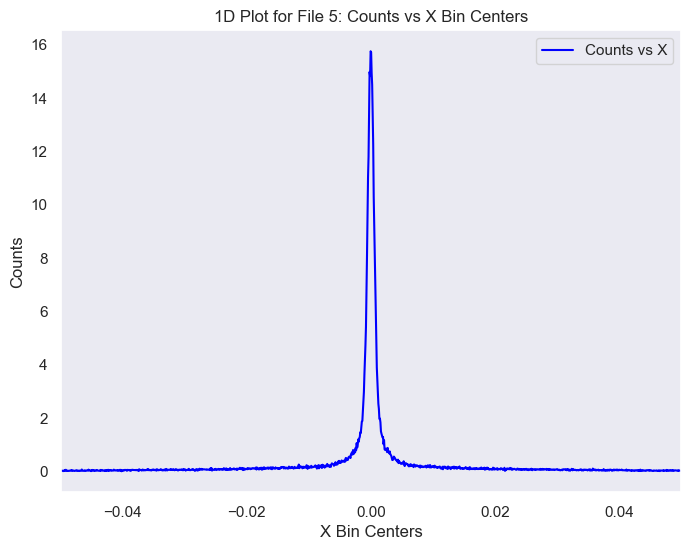

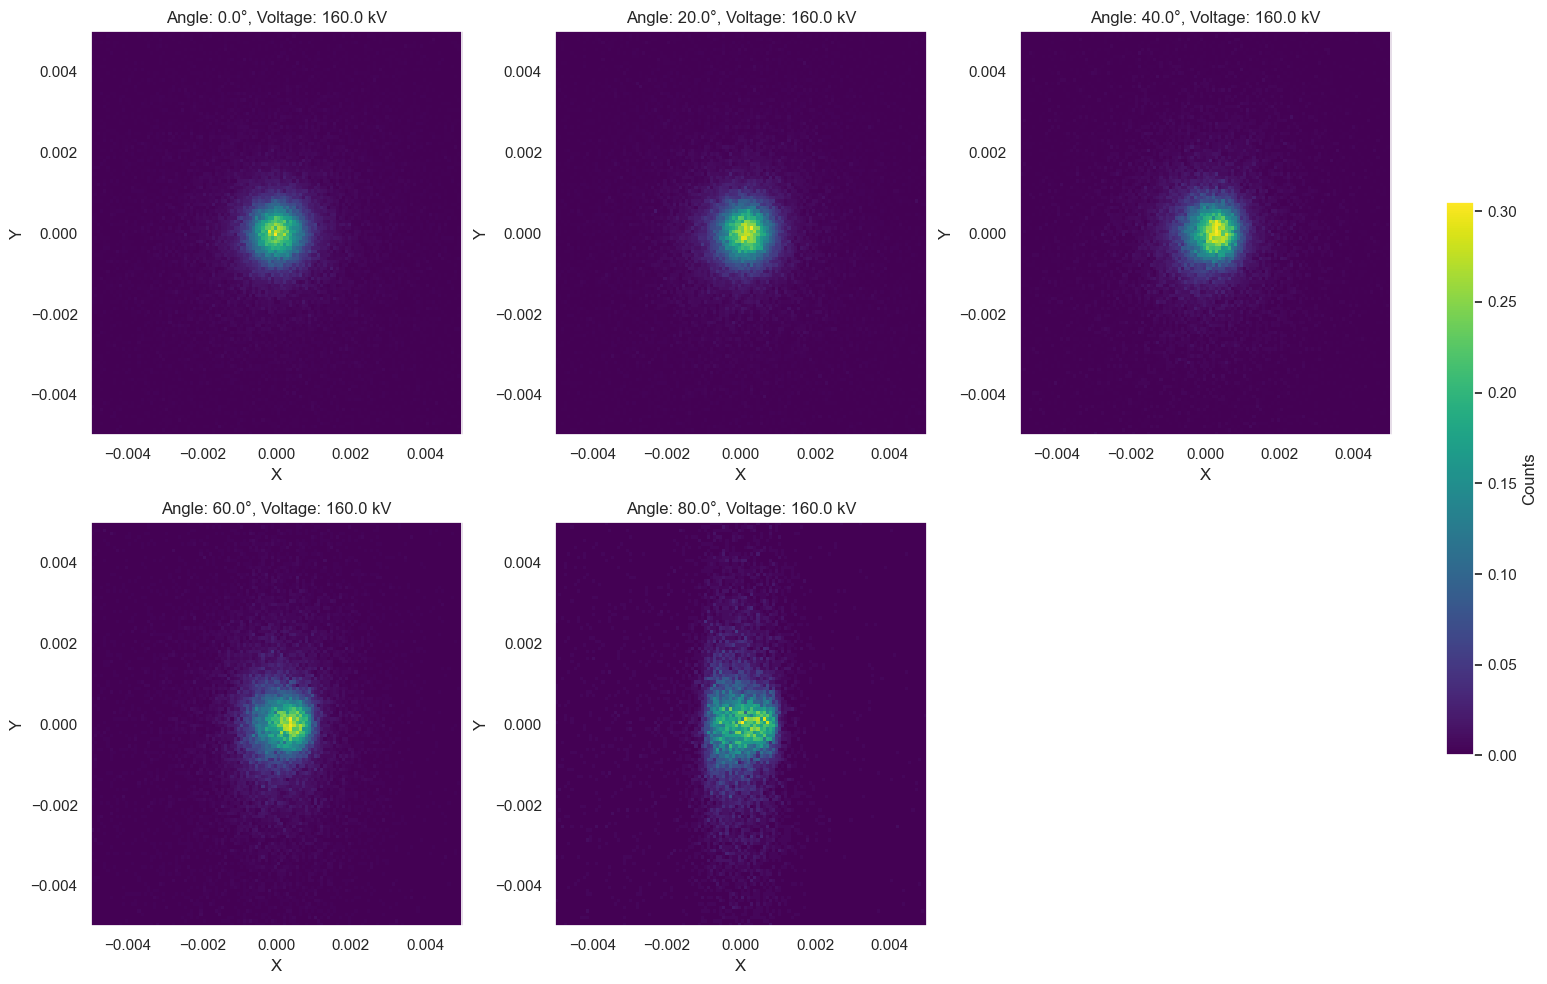

In [ ]:
#directory = 'angular_analysis/29-03-25/root_files_HP'
directory = 'C:/Users/felnor/OneDrive - Excillum AB/Desktop/new_analysis/angular_analysis/29-03-25/root_files_HP'

# Load all files in the directory
files = glob.glob(f"{directory}/*.root")
print(f"Found {len(files)} files in {directory}")

# Initialize an empty DataFrame to combine data
combined_df = pd.DataFrame()
rng = 0.05
lim1d = 0.05
lim2d = 0.005
# Loop through files and load data
for i, file in enumerate(files):
    print(f"Loading {file}")
    # Load data for the first axis to get weights and sim_params
    x, weights, sim_params = DL.load_data(file, axis='xt', interaction='brem')
    y, _, _ = DL.load_data(file, axis='y', interaction='brem')
    
    # Combine the data into a DataFrame
    file_df = pd.DataFrame({
        'x': x,
        'y': y,
        'weights': weights
    })
    
    # Add simulation parameters as columns
    for col in sim_params.columns:
        file_df[col] = sim_params[col].iloc[0]
    
    # Add an identifier for the file
    file_df['file_index'] = i
    
    # Append to the main DataFrame
    combined_df = pd.concat([combined_df, file_df], ignore_index=True)

# Filter data for a single file (e.g., file_index = 5)
single_file_data = combined_df[combined_df['file_index'] == 5]
x_single = single_file_data['x'].values
weights_single = single_file_data['weights'].values

# Create 1D plot for the single file
plt.figure(figsize=(8, 6))
counts_single, x_edges_single = np.histogram(x_single, bins=1200, range=(-lim1d, lim1d), weights=weights_single)
x_bin_centers_single = (x_edges_single[:-1] + x_edges_single[1:]) / 2
plt.plot(x_bin_centers_single, counts_single, label='Counts vs X', color='blue')
plt.title("1D Plot for File 5: Counts vs X Bin Centers")
plt.xlabel("X Bin Centers")
plt.ylabel("Counts")
plt.xlim(-lim1d, lim1d)
plt.legend()
plt.grid(False)
plt.show()

# Filter files with acc_voltage = 160
filtered_files = combined_df[combined_df['acc_voltage'] == 160.0]['file_index'].unique()

# Determine the number of rows and columns for subplots
n_files = len(filtered_files)
n_cols = 3
n_rows = (n_files + n_cols - 1) // n_cols

# Set up subplots for 2D spot plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for idx, file_index in enumerate(filtered_files):
    # Filter data for the current file
    file_data = combined_df[combined_df['file_index'] == file_index]
    x = file_data['x'].values
    y = file_data['y'].values
    weights = file_data['weights'].values

    # Get simulation parameters for labeling
    sim_params = file_data.iloc[0]
    acc_voltage = sim_params['acc_voltage']
    angle = sim_params['angle']
    di_thickness = sim_params['diamond_thickness']
    w_thickness = sim_params['tungsten_thickness']
    x -= (np.sin(np.radians(angle))*di_thickness / 1e3 + np.sin(np.radians(angle))*w_thickness/2e3) # account for the offset if the detection angle is not zero. The second term is the tungsten offset / 2 so that the spot is always centered around zero.

    # Create 2D histogram
    counts, x_edges, y_edges = np.histogram2d(x, y, bins=1200, range=[(-rng, rng), (-rng, rng)], weights=weights, density=False)

    # Plot 2D spot plot
    im = axes[idx].imshow(counts.T, extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], origin='lower', cmap='viridis', aspect='auto')
    axes[idx].set_title(f"Angle: {angle}°, Voltage: {acc_voltage} kV")
    axes[idx].set_xlabel("X")
    axes[idx].set_ylabel("Y")
    axes[idx].set_xlim(-lim2d, lim2d)
    axes[idx].set_ylim(-lim2d, lim2d)
    axes[idx].grid(False)

# Remove unused subplots
for ax in axes[n_files:]:
    fig.delaxes(ax)

# Adjust layout and add colorbar
plt.tight_layout()
fig.colorbar(im, ax=axes[:n_files], label='Counts', orientation='vertical', fraction=0.02, pad=0.04)
plt.show()


In [79]:
#directory = 'angular_analysis/29-03-25/root_files_HP'
directory= 'C:/Users/felnor/OneDrive - Excillum AB/Desktop/new_analysis/angular_analysis/29-03-25/root_files_HP'

# Load all files in the directory
files = glob.glob(f"{directory}/*.root")
print(f"Found {len(files)} files in {directory}")
# Load some data from the files
for i, file in enumerate(files):
    print(f"Loading {file}")
    # Load data for the first axis to get weights and sim_params
    x, weights, sim_params = DL.load_data(file, axis='xt')
    y, _, _ = DL.load_data(file, axis='y')
    
    # Combine the data into a DataFrame
    file_df = pd.DataFrame({
        'x': x,
        'y': y,
        'weights': weights
    })
    
    # Add simulation parameters as columns
    for col in sim_params.columns:
        file_df[col] = sim_params[col].iloc[0]
    
    # Add an identifier for the file
    file_df['file_index'] = i
    
    # Append to the main DataFrame
    if i == 0:
        combined_df = file_df
    else:
        combined_df = pd.concat([combined_df, file_df], ignore_index=True)

# Print the combined DataFrame
print(combined_df.head())


Found 15 files in C:/Users/felnor/OneDrive - Excillum AB/Desktop/new_analysis/angular_analysis/29-03-25/root_files_HP
Loading C:/Users/felnor/OneDrive - Excillum AB/Desktop/new_analysis/angular_analysis/29-03-25/root_files_HP\output_voltage_100_angle_0.root
Loading C:/Users/felnor/OneDrive - Excillum AB/Desktop/new_analysis/angular_analysis/29-03-25/root_files_HP\output_voltage_100_angle_20.root
Loading C:/Users/felnor/OneDrive - Excillum AB/Desktop/new_analysis/angular_analysis/29-03-25/root_files_HP\output_voltage_100_angle_40.root
Loading C:/Users/felnor/OneDrive - Excillum AB/Desktop/new_analysis/angular_analysis/29-03-25/root_files_HP\output_voltage_100_angle_60.root
Loading C:/Users/felnor/OneDrive - Excillum AB/Desktop/new_analysis/angular_analysis/29-03-25/root_files_HP\output_voltage_100_angle_80.root
Loading C:/Users/felnor/OneDrive - Excillum AB/Desktop/new_analysis/angular_analysis/29-03-25/root_files_HP\output_voltage_160_angle_0.root
Loading C:/Users/felnor/OneDrive - Exc